## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter-006-001B-k-Nearest-Neighbor

In [1]:
from sklearn.neighbors import NearestNeighbors
import sklearn.neighbors as skn
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from random import sample
import matplotlib._color_data as mcd

In [2]:
ncnt1=4
ncnt2=8

In [3]:
np.random.seed(1968)
nrcnt=50
bdisplay=True

In [4]:
colors1 = np.array(list(sorted({name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS}, reverse=False)))
colors=np.random.choice(colors1,nrcnt)
if bdisplay:
    print(colors)

['gold' 'maroon' 'red' 'aqua' 'orangered' 'orangered' 'yellowgreen'
 'sienna' 'darkblue' 'silver' 'lavender' 'lightgreen' 'silver' 'red'
 'aqua' 'khaki' 'darkgreen' 'fuchsia' 'turquoise' 'goldenrod' 'red' 'navy'
 'khaki' 'ivory' 'fuchsia' 'magenta' 'aqua' 'olive' 'teal' 'red' 'silver'
 'magenta' 'tomato' 'coral' 'gold' 'olive' 'khaki' 'violet' 'beige'
 'goldenrod' 'tomato' 'red' 'goldenrod' 'salmon' 'azure' 'aquamarine'
 'ivory' 'navy' 'lavender' 'chocolate']


In [5]:
fileName = '../../Data/Postcodes001.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Postcodes001.csv


In [6]:
datarawdf = pd.read_csv(fileFullName, header=0)
print(datarawdf.shape)
print(datarawdf.columns)

(1762397, 4)
Index(['id', 'postcode', 'latitude', 'longitude'], dtype='object')


In [7]:
indices = np.random.randint(0,datarawdf.shape[0],nrcnt)
datadf=datarawdf.loc[indices]
if bdisplay:
    print(datadf)

              id  postcode   latitude  longitude
462950    489117  RG31 5BB  51.458275  -1.043626
639955    674630  NP20 1DX  51.587283  -2.995025
1693363  1784624   IV1 9EJ  57.479403  -4.226319
1510849  1587334  AB33 8UE  57.232838  -2.694113
1196331  1258318   DY5 2UW  52.478605  -2.120513
970780   1020486  IP14 1PJ  52.188264   0.994159
252815    267793  ST19 9DU  52.676660  -2.177306
591593    623890  OL16 2HD  53.619527  -2.145953
53766      56045   WF9 1PF  53.619468  -1.286388
322807    341305   SL6 6DG  51.522591  -0.735552
26269      27200  WV12 4TT  52.595360  -2.031106
1315474  1382257   CV2 3JY  52.426312  -1.466692
75245      79026  WC1N 1HQ  51.524357  -0.126625
1547429  1625472   BD1 9SW  53.792312  -1.753277
824265    868414  LS16 5BB  53.835846  -1.601400
687958    724900  NE92 1AB  54.941775  -1.614988
1470025  1544711   BN3 2LT  50.826664  -0.166336
1338373  1406583   CR2 8DL  51.344445  -0.070892
393274    415685  SA14 9HY  51.678038  -4.119135
828790    873074  LS

In [8]:
Xdf = datadf[['latitude', 'longitude']].copy(deep=True)
if bdisplay:
    print(Xdf.shape)
    print(Xdf.columns)

(50, 2)
Index(['latitude', 'longitude'], dtype='object')


In [9]:
sorted(skn.VALID_METRICS['ball_tree'])

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'dice',
 'euclidean',
 'hamming',
 'haversine',
 'infinity',
 'jaccard',
 'kulsinski',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'matching',
 'minkowski',
 'p',
 'pyfunc',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'wminkowski']

In [10]:
sorted(skn.VALID_METRICS['kd_tree'])

['chebyshev',
 'cityblock',
 'euclidean',
 'infinity',
 'l1',
 'l2',
 'manhattan',
 'minkowski',
 'p']

In [11]:
sorted(skn.VALID_METRICS['brute'])

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'jaccard',
 'kulsinski',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'matching',
 'minkowski',
 'precomputed',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'wminkowski',
 'yule']

In [12]:
nbrs1 = NearestNeighbors(n_neighbors=ncnt1,
                         algorithm='ball_tree',
                         n_jobs=-1,
                         metric='l2'                         
                       ).fit(Xdf)

distances1, indices1 = nbrs1.kneighbors(Xdf)

n1=nbrs1.kneighbors_graph(Xdf).toarray()

In [13]:
if bdisplay:
    print('Indices')
    print('---------------')
    print(indices1)
    print('Distances')
    print('---------------')
    print(distances1)

    print('K-neighbors')
    print('---------------')
    print(n1)

Indices
---------------
[[ 0 20  9 43]
 [ 1 41 37 18]
 [ 2  3 21 49]
 [ 3 21 49  2]
 [ 4 10  6 33]
 [ 5 23 45 22]
 [ 6 10  4 33]
 [ 7 34 38 48]
 [ 8 19 14 13]
 [ 9 20  0 46]
 [10  4  6 33]
 [11 44 39 33]
 [12 28 42 36]
 [13 48 14 19]
 [14 19 13 48]
 [15 47 30 14]
 [16 17 29 32]
 [17 32 42 28]
 [18 41  1 27]
 [19 14 13 48]
 [20  9  0 43]
 [21 49  3  2]
 [22  5 17 32]
 [23 45  5 22]
 [24 31  7 38]
 [25 20  0 26]
 [26 25 40  0]
 [27 18 41  1]
 [28 12 42 36]
 [29 36 28 12]
 [30 15 47 14]
 [31 24 38  7]
 [32 42 28 12]
 [33 10  4  6]
 [34 38  7 48]
 [35 31 24 41]
 [36 28 12 42]
 [37 40  4 33]
 [38 34  7 48]
 [39 44 11 33]
 [40 37 43 26]
 [41  1 18 37]
 [42 32 12 28]
 [43  0 20  9]
 [44 11 39 33]
 [45 23  5 22]
 [46  9 36 29]
 [47 15 30 14]
 [48 13 14 19]
 [49 21  3 15]]
Distances
---------------
[[0.         0.21144148 0.31471597 0.31721493]
 [0.         0.44324618 0.99442293 1.12776765]
 [0.         1.55191834 1.64199996 1.96850945]
 [0.         1.15933571 1.38513967 1.55191834]
 [0.       

In [14]:
X = np.array(Xdf['latitude']).reshape(1,-1).T
if bdisplay:
    print(X.shape)

(50, 1)


In [15]:
Y = np.array(Xdf['longitude']).reshape(1,-1).T
if bdisplay:
    print(Y.shape)

(50, 1)


In [16]:
xmin=np.floor(min(X))
xmax=np.ceil(max(X))
ymin=np.floor(min(Y))
ymax=np.ceil(max(Y))
print(xmin,xmax,ymin,ymax)

[50.] [58.] [-5.] [2.]


In [17]:
if n1.shape[0] > colors.shape[0]:
    step=int(np.ceil(n1.shape[0]/colors.shape[0]))
else:
    step=1

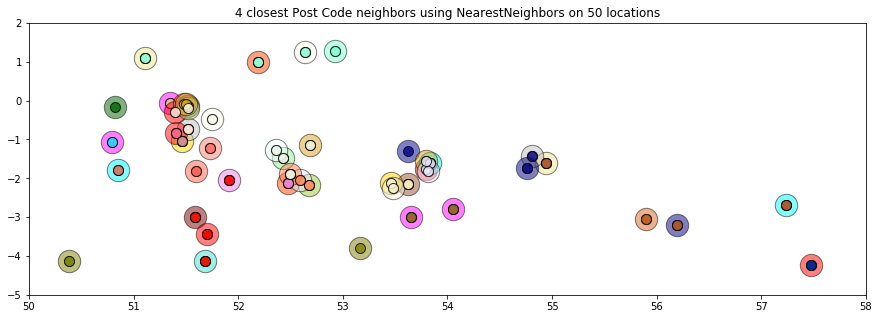

In [18]:
fig1=plt.figure(figsize=(15, 5))
titlename = '%d closest Post Code neighbors using NearestNeighbors on %d locations' % (ncnt1, nrcnt)
plt.title(titlename)

k=-1
for p in range(0,n1.shape[0],step):  
    l=n1[p]
    k+=1
    c=colors[k]
    plt.scatter(X[p], 
                Y[p], 
                marker='o', 
                s=500,
                alpha=0.5, 
                edgecolors='k',
                antialiased=True,
                c=c
               )
    for i in range(l.shape[0]):
        if l[i] == 1:
            plt.scatter(X[i], 
                        Y[i], 
                        marker='o', 
                        s=100, 
                        alpha=0.8, 
                        edgecolors='k',
                        antialiased=True,
                        c=c
                       )
            plt.plot(X[p],X[i], 
                     Y[p],Y[i],
                     c=c,
                     alpha=1.0,
                     antialiased=True,
                     linestyle='--',
                     linewidth=3
                    )

plt.axis([xmin,xmax,ymin,ymax])
#plt.autoscale(enable=True, axis='x', tight=False)
plt.show()

In [19]:
nbrs2 = NearestNeighbors(n_neighbors=ncnt2, 
                        algorithm='ball_tree',
                         n_jobs=-1,
                         metric='l2'            
                       ).fit(X)

distances2, indices2 = nbrs2.kneighbors(X)

n2=nbrs2.kneighbors_graph(X).toarray()

In [20]:
if bdisplay:
    print('Indices')
    print('---------------')
    print(indices2)
    print('Distances')
    print('---------------')
    print(distances2)

    print('K-neighbors')
    print('---------------')
    print(n2)

Indices
---------------
[[ 0 32 42 28 20 36  9 12]
 [ 1 40 12  9 36 28 42 18]
 [ 2  3 21 49 15 30 47 24]
 [ 3  2 21 49 15 30 47 24]
 [ 4 33 11 44 10 23  6 39]
 [ 5 44 11 37  4 33 10 46]
 [ 6 39 23 10 33  4 45 11]
 [ 7  8 31 38 34 19 13 48]
 [ 8  7 31 38 34 19 13 48]
 [ 9 12 36 28 42 32  0  1]
 [10 23  6 39 33  4 11 44]
 [11  4 44 33 10 23  5  6]
 [12  9 36 28 42 32  1  0]
 [13 19 48 14 31  7  8 24]
 [14 48 13 19 31 24  7  8]
 [15 30 47 24 49 14 48 13]
 [16 26 25 22 27 17 29 20]
 [17 29 20  0 32 42 28 36]
 [18 41 43 46 40  1 12  9]
 [19 13 48 14 31  7  8 24]
 [20 29  0 17 32 42 28 36]
 [21 49  3 15  2 30 47 24]
 [22 17 26 29 16 20 25  0]
 [23 10  6 39 33  4 11 44]
 [24 14 48 13 19 31  7  8]
 [25 16 26 22 27 17 29 20]
 [26 16 25 22 27 17 29 20]
 [27 25 16 26 22 17 29 20]
 [28 36 42  9 12 32  0  1]
 [29 20 17  0 32 42 28 36]
 [30 47 15 24 14 48 13 19]
 [31  7  8 19 13 38 48 34]
 [32  0 42 28 36  9 12 20]
 [33  4 11 10 44 23  6 39]
 [34 38  8  7 31 35 19 13]
 [35 45 34 38  8  7 39  6]
 [36

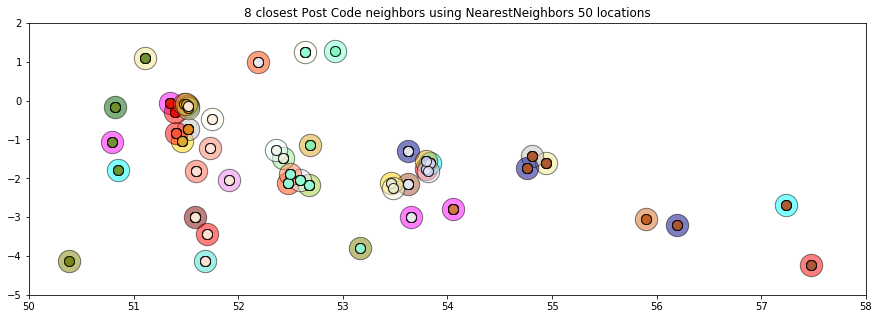

In [21]:
fig2=plt.figure(figsize=(15, 5))
titlename = '%d closest Post Code neighbors using NearestNeighbors %d locations' % (ncnt2, nrcnt)
plt.title(titlename)
k=-1
for p in range(0,n2.shape[0],step): 
    l=n2[p]
    k+=1
    c=colors[k]
    plt.scatter(X[p], 
                Y[p], 
                marker='o', 
                s=500,
                alpha=0.5, 
                edgecolors='k',
                antialiased=True,
                c=c
               )
    for i in range(l.shape[0]):
        if l[i] == 1:
            plt.scatter(X[i], 
                        Y[i], 
                        marker='o', 
                        s=100, 
                        alpha=0.8, 
                        edgecolors='k',
                        antialiased=True,
                        c=c
                       )
            plt.plot(X[p],X[i], 
                     Y[p],Y[i],
                     c=c,
                     alpha=0.6,
                     antialiased=True,
                     linestyle='--',
                     linewidth=3
                    )

plt.axis([xmin,xmax,ymin,ymax])
#plt.autoscale(enable=True, axis='x', tight=False)
plt.show()

In [22]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06'])
print(imagepath)

if not os.path.exists(imagepath):
    os.makedirs(imagepath)
    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-Example-001B-01.jpg'])
fig1.savefig(imagename, bbox_inches='tight')     
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-Example-001B-02.jpg'])
fig2.savefig(imagename, bbox_inches='tight') 

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06


## Done

In [23]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-19 08:27:39.032656
